## **Unsupervised Learning: Clustering**

**Goal**: the objective is to develop an ML algorithm to group shopping mall customers.

_dataset source_: [Kraggle - Mall Customers](https://www.kaggle.com/datasets/shwetabh123/mall-customers)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('datasets/mall_customers.csv')
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


**ATTRIBUTES:** 

- CustomerID: (identificação do cliente);

- Genre: (Gênero);

- Age: (idade);

- Annual Income (k$):	(Rendimento anual);

- Spending Score (1 a 100): (Pontuação de gastos).

In [4]:
# Age

hist =  px.histogram (df,  x = "Age", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribution of Ages') 
hist.show()

In [5]:
# Genre 

df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [6]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

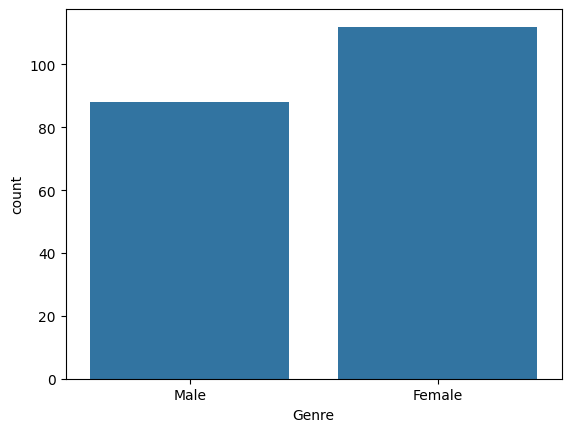

In [7]:
sns.countplot(x='Genre', data=df)

In [8]:
df.shape

(200, 5)

#### **EDA AND DATA PROCESSING**

In [9]:
# Missing values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Data type

df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
# Statistics

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# Outliers

boxplot = px.box(df, y="Annual Income (k$)")
boxplot.show()

In [13]:
boxplot = px.box(df, y="Age")
boxplot.show()

In [14]:
boxplot = px.box(df, y="Spending Score (1-100)")
boxplot.show()

In [15]:
# Dropping customer id

df2 = df.drop(labels = 'CustomerID', axis = 1)

In [16]:
# Transforming categorical variables into numeric

df2['Genre'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [17]:
df2.head(4)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77


In [18]:
# Scaling:

scaler = StandardScaler()
scaler_df2 = scaler.fit_transform(df2)

In [19]:
scaler_df2

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [20]:
# K-means with two attributes

df2.head(2)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81


In [21]:
data = df2.iloc[:, [2,3]].values

In [22]:
# values for 'Annual Income (k$)' and 'Spending Score (1-100)'

data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [23]:
# Elbow Method:

# # Within-Cluster Sum of Squares (WCSS) 

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(data)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

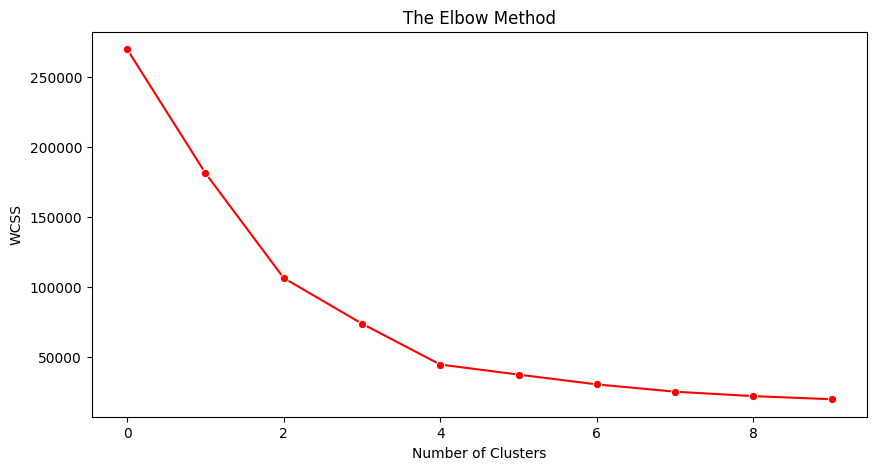

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [25]:
# Clustering

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [26]:
kmeans1 = kmeans.fit(data)

In [27]:
# Centroids

centroids = kmeans1.cluster_centers_
centroids

array([[26.30434783, 20.91304348],
       [48.26      , 56.48      ],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [28]:
# Data classification 

classification = kmeans1.labels_
classification

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [29]:
data[3,:]

array([16, 77], dtype=int64)

In [30]:
classification[3]

1

In [31]:
graf1 = px.scatter(x = data[:,0], y = data[:,1], color=classification)
graf2 = px.scatter(x = centroids[:,0], y = centroids[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='K-Means Clustering')
graf3.update_xaxes(title = 'Annual Income (k$)	')
graf3.update_yaxes(title = 'Spending Score')
graf3.show()

In [32]:
clustering = pd.DataFrame(classification, columns = ['Group'])

In [33]:
clustering

,Group
0,0
1,1
2,0
3,1
4,0
...,...
195,3
196,2
197,3
198,2


In [34]:
df3 = pd.concat([df, clustering],axis=1)

In [35]:
df3

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [36]:
df3.iloc[150 , :]

CustomerID                 151
Genre                     Male
Age                         43
Annual Income (k$)          78
Spending Score (1-100)      17
Group                        2
Name: 150, dtype: object

In [37]:
df3.loc[df3.CustomerID == 92] 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
91,92,Male,18,59,41,1


In [38]:
group0 = df3.loc[df3.Group == 0]
group0

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0


In [39]:
group0.shape

(23, 6)

In [40]:
group1 = df3.loc[df3.Group == 1]
group1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
...,...,...,...,...,...,...
118,119,Female,51,67,43,1
119,120,Female,50,67,57,1
120,121,Male,27,67,56,1
121,122,Female,38,67,40,1


In [41]:
group1.shape

(100, 6)

In [42]:
# K-means with all attributes

scaler_df2

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [43]:
scaler_df2.shape

(200, 4)

In [44]:
# Elbow method

wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(scaler_df2)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

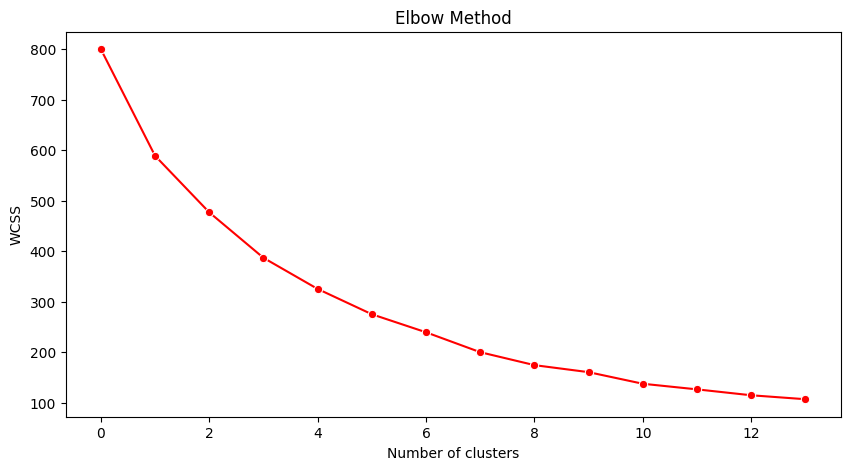

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [46]:
# Clustering 

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=5, max_iter=300)

In [47]:
kmeans2 = kmeans.fit(scaler_df2)

In [48]:
# Centroids

centroids = kmeans2.cluster_centers_
centroids

array([[ 1.12815215,  1.26189763, -0.45650637, -0.45421226],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 1.12815215, -0.74922584, -0.08890541,  0.79653879],
       [-0.88640526,  0.82690247, -0.3657874 , -0.43028735],
       [ 0.33671888,  0.04408525,  1.17687256, -1.32908386],
       [-0.71122636, -0.48536124,  1.12370799,  1.21089512]])

In [50]:
# Reverse scaling

scaler.inverse_transform(kmeans2.cluster_centers_)

array([[ 1.00000000e+00,  5.64333333e+01,  4.86000000e+01,
         3.85000000e+01],
       [ 1.66533454e-16,  2.59459459e+01,  4.22162162e+01,
         5.74594595e+01],
       [ 1.00000000e+00,  2.84102564e+01,  5.82307692e+01,
         7.07179487e+01],
       [-5.55111512e-17,  5.03720930e+01,  5.09767442e+01,
         3.91162791e+01],
       [ 6.07142857e-01,  3.94642857e+01,  9.13928571e+01,
         1.59642857e+01],
       [ 8.69565217e-02,  3.20869565e+01,  9.00000000e+01,
         8.13913043e+01]])

In [51]:
# Data classification

classification2 = kmeans2.labels_
classification2

array([2, 2, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 1, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 2, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 5, 0, 2, 0, 2, 4, 2,
       1, 5, 4, 5, 4, 2, 4, 5, 3, 2, 1, 5, 4, 2, 0, 5, 4, 2, 4, 2, 3, 5,
       3, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 4, 5, 4, 2, 4, 2, 4, 2, 4, 5,
       4, 2, 4, 2, 4, 5, 4, 5, 4, 2, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5])

In [52]:
classification2[199]

5

In [53]:
clustering2 = pd.DataFrame(classification2, columns=['Grupo'])
clustering2

,Grupo
0,2
1,2
2,1
3,1
4,1
...,...
195,5
196,4
197,5
198,4


In [54]:
df4 = pd.concat([df, clustering2], axis=1)
df4

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,4
197,198,Male,32,126,74,5
198,199,Male,32,137,18,4


In [55]:
df4.iloc[125, :]

CustomerID                   126
Genre                     Female
Age                           31
Annual Income (k$)            70
Spending Score (1-100)        77
Grupo                          5
Name: 125, dtype: object

In [57]:
df4.loc[df4.CustomerID == 76] 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Grupo
75,76,Male,26,54,54,2


In [58]:
group0 = df4.loc[df4.Grupo == 0]
group0 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Grupo
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
14,15,Male,37,20,13,0
18,19,Male,52,23,29,0
20,21,Male,35,24,35,0
30,31,Male,60,30,4,0
32,33,Male,53,33,4,0
42,43,Male,48,39,36,0
53,54,Male,59,43,60,0
55,56,Male,47,43,41,0


In [59]:
group0.shape

(30, 6)

In [62]:
# K-Means com PCA

scaler_df2[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [63]:
scaler_df2.shape

(200, 4)

In [64]:
# PCA

from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=2)

In [66]:
df2_pca = pca.fit_transform(scaler_df2)

In [68]:
df2_pca[:5]

array([[-0.40638272, -0.52071363],
       [-1.42767287, -0.3673102 ],
       [ 0.05076057, -1.89406774],
       [-1.6945131 , -1.63190805],
       [-0.31310838, -1.81048272]])

In [69]:
# Explained variance ratio

pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

In [70]:
# Sum explained variance ratio
pca.explained_variance_ratio_.sum()

0.5992069019819846

In [71]:
# Elbow method

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

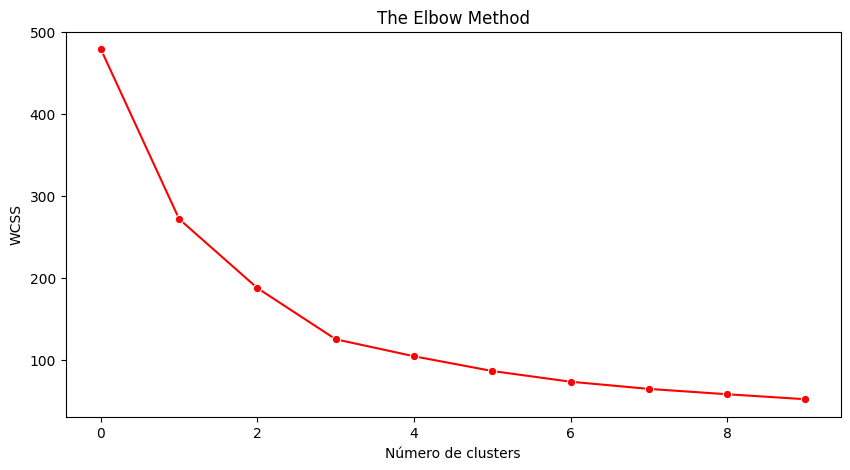

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [74]:
# Clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=300)

In [75]:
kmeans3 = kmeans.fit(df2_pca)

In [76]:
# Centroids

centroids = kmeans3.cluster_centers_
centroids

array([[-0.89924813,  1.20707643],
       [ 1.12773395,  0.75231371],
       [ 0.80089898, -0.95285608],
       [-1.15915328, -0.51472072]])

In [77]:
# Data classification

classification3 = kmeans3.labels_
classification3

array([3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3,
       2, 3, 2, 3, 3, 3, 2, 0, 3, 1, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 3, 1, 2, 2, 2, 1, 0, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 2, 3,
       3, 2, 2, 0, 1, 2, 3, 0, 2, 3, 1, 0, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1,
       1, 3, 2, 0, 3, 3, 2, 2, 2, 2, 0, 2, 3, 0, 3, 3, 1, 0, 1, 0, 1, 0,
       3, 3, 1, 3, 2, 0, 1, 3, 2, 0, 3, 3, 1, 0, 1, 3, 2, 0, 1, 0, 2, 3,
       2, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [79]:
classification3[2]

2

In [80]:
graf1 = px.scatter(x=df2_pca[:,0], y=df2_pca[:,1], color=classification3)
graf2 = px.scatter(x=centroids[:,0], y=centroids[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data=graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title='Componente 1')
graf3.update_yaxes(title='Componente 2')
graf3.show()

In [81]:
clustering3 = pd.DataFrame(classification3, columns = ['Grupo'])
clustering3

,Grupo
0,3
1,3
2,2
3,3
4,2
...,...
195,0
196,1
197,0
198,1


In [82]:
df5 = pd.concat([df, clustering3],axis=1)
df5

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Grupo
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [83]:
df5.iloc[125,:]

CustomerID                   126
Genre                     Female
Age                           31
Annual Income (k$)            70
Spending Score (1-100)        77
Grupo                          3
Name: 125, dtype: object

In [84]:
df5.loc[df5.CustomerID == 76] 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Grupo
75,76,Male,26,54,54,0


In [85]:
group0 = df5.loc[df5.Grupo == 0]
group0 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Grupo
51,52,Male,33,42,60,0
61,62,Male,19,46,55,0
65,66,Male,18,48,59,0
68,69,Male,19,48,59,0
75,76,Male,26,54,54,0
91,92,Male,18,59,41,0
95,96,Male,24,60,52,0
99,100,Male,20,61,49,0
103,104,Male,26,62,55,0
113,114,Male,19,64,46,0


In [86]:
group0.shape

(36, 6)